In [64]:
import pandas

In [65]:
movies=pandas.read_csv('movie.csv')
movies.head(5)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [66]:
movies.isnull().sum()

text     0
label    0
dtype: int64

In [67]:
movies['label'].replace({
    0 : 'negative', 
    1 : 'somewhat negative',
    2 : 'neutral',
    3 : 'somewhat positive', 
    4 : 'positive',

},inplace=True)


/tmp/ipykernel_4994/1257096092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['label'].replace({


In [86]:
positive=movies[movies['label']=='positive'].count()
negative=movies[movies['label']=='negative'].count()
neutral=movies[movies['label']=='neutral'].count()
negative

text     20019
label    20019
dtype: int64

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

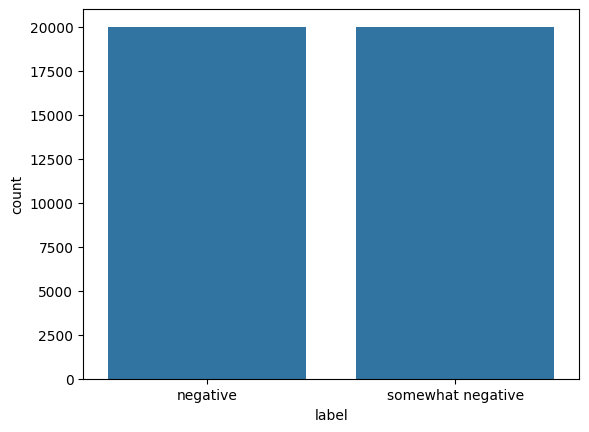

In [70]:
sns.countplot(x='label',data=movies)

<Axes: >

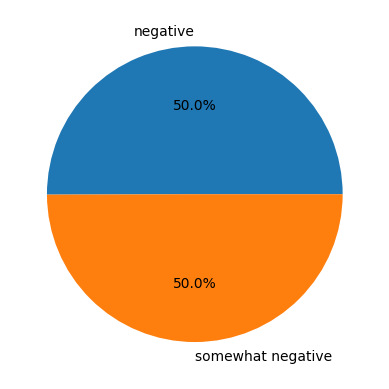

In [87]:
movies.groupby('label').size().plot(kind='pie',autopct='%1.1f%%')

In [72]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test =model_selection.train_test_split(movies['text'],movies['label'],test_size=0.3,random_state=42)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(lowercase=True,stop_words='english')
X_train_new=vectorizer.fit_transform(X_train)
X_train_new

<28000x79922 sparse matrix of type '<class 'numpy.int64'>'
	with 2476083 stored elements in Compressed Sparse Row format>

In [74]:
from sklearn.linear_model import LogisticRegression,SGDRegressor,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

model=LogisticRegression()
model.fit(X_train_new,Y_train)

/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
X_test_new=vectorizer.transform(X_test)
prediction=model.predict(X_test_new)
prediction
print(movies.groupby('label').size())

label
negative             20019
somewhat negative    19981
dtype: int64


In [76]:
new_sample=vectorizer.transform(movies['text'])
outcome=model.predict(new_sample)
print('The new  sentiment prediction of movies are:', outcome)


outcome_table=pandas.DataFrame(outcome,columns=['Sentiments'])
outcome_table

The new  sentiment prediction of movies are: ['negative' 'negative' 'negative' ... 'negative' 'somewhat negative'
 'somewhat negative']


,Sentiments
0,negative
1,negative
2,negative
3,negative
4,somewhat negative
...,...
39995,somewhat negative
39996,somewhat negative
39997,negative
39998,somewhat negative


In [ ]:
negative=movies[movies['label']=='negative']
positive=movies[movies['label']=='positive']
neutral=movies[movies['label']=='neutral']

In [ ]:
negative.to_csv('negative.csv')
positive.to_csv('positive.csv')
neutral.to_csv('neutral.csv')